1. Input Parameters
2. Simulate Wells
3. Analyze Production
4. Visualize Results
5. Export Production Data as CSV
6. Exit


Enter your choice:  1
Enter decline rate (Di):  0.5
Enter time to simulate (in years):  4



Decline rate and time to simulate recorded successfully.
1. Input Parameters
2. Simulate Wells
3. Analyze Production
4. Visualize Results
5. Export Production Data as CSV
6. Exit


Enter your choice:  2
Enter the number of wells:  3



Enter parameters for Well 1:


Initial production rate (Qi):  3000



Enter parameters for Well 2:


Initial production rate (Qi):  4000



Enter parameters for Well 3:


Initial production rate (Qi):  5000



Parameters recorded successfully.
1. Input Parameters
2. Simulate Wells
3. Analyze Production
4. Visualize Results
5. Export Production Data as CSV
6. Exit


Enter your choice:  3



Input Parameters:
Decline Rate: 0.5
Time to Simulate: 4 years

Well 1 - Initial Production Rate (Qi): 3000.0
Production Rate at Each Time Step: [3000.0, 1819.5925911147485, 1103.6390658798946, 669.3911558466193, 406.0063959120821]
Cumulative Production: [3000.0, 4819.592591114749, 5923.231656994643, 6592.622812841262, 6998.629208753344]
Average Production: 1399.7258417506687

Well 2 - Initial Production Rate (Qi): 4000.0
Production Rate at Each Time Step: [4000.0, 2426.1234548196644, 1471.5187545065262, 892.5215411288258, 541.3418612161095]
Cumulative Production: [4000.0, 6426.123454819664, 7897.642209326191, 8790.163750455016, 9331.505611671126]
Average Production: 1866.301122334225

Well 3 - Initial Production Rate (Qi): 5000.0
Production Rate at Each Time Step: [5000.0, 3032.654318524581, 1839.3984431331578, 1115.6519264110323, 676.6773265201368]
Cumulative Production: [5000.0, 8032.654318524581, 9872.052761657738, 10987.70468806877, 11664.382014588908]
Average Production: 2332.876

Enter your choice:  4


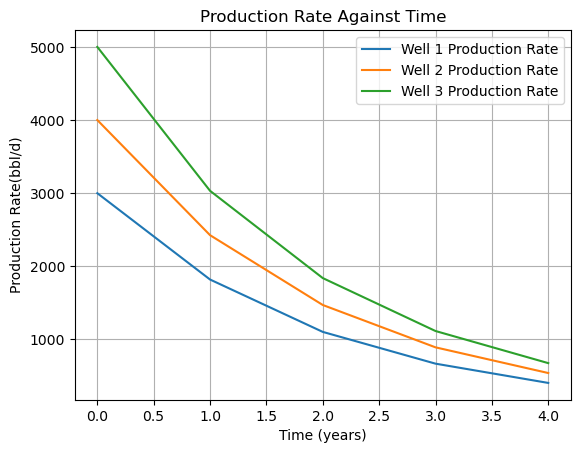

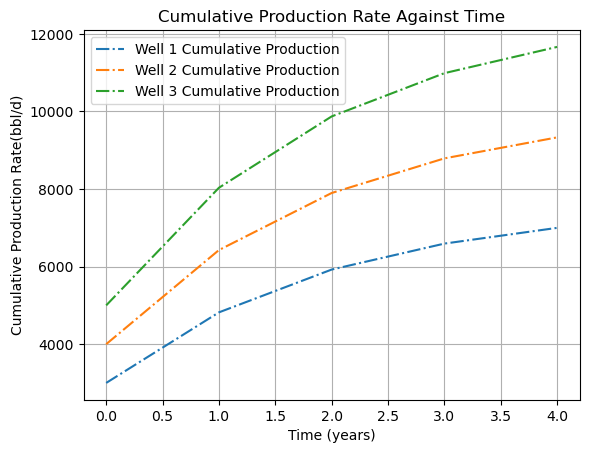

1. Input Parameters
2. Simulate Wells
3. Analyze Production
4. Visualize Results
5. Export Production Data as CSV
6. Exit


In [ ]:
 import csv
import matplotlib.pyplot as plt

class Main:
    def __init__(self):
        self.wells_parameters = []
        self.time_to_simulate = None
        self.decline_rate = None
    
    def show_menu(self):
        print("1. Input Parameters")
        print("2. Simulate Wells")
        print("3. Analyze Production")
        print("4. Visualize Results")
        print("5. Export Production Data as CSV")
        print("6. Exit")
    
    def input_parameters(self):
        self.decline_rate = float(input("Enter decline rate (Di): "))
        self.time_to_simulate = int(input("Enter time to simulate (in years): "))
        print("\nDecline rate and time to simulate recorded successfully.")
    
    def simulate_wells(self):
        production_data = [[] for _ in range(len(self.wells_parameters))]
        for i, (Qi, _, _) in enumerate(self.wells_parameters):
            for time in range(self.time_to_simulate + 1):
                production_data[i].append(self.arps_model(Qi, time))
        print("\nSimulation completed.")
        return production_data
    
    def arps_model(self, Qi, time):
        return Qi * (2.71828 ** (-self.decline_rate * time))
    
    def analyze_production(self):
        print("\nInput Parameters:")
        print(f"Decline Rate: {self.decline_rate}")
        print(f"Time to Simulate: {self.time_to_simulate} years")
        
        production_at_time = [[] for _ in range(len(self.wells_parameters))]
        cumulative_production = [[] for _ in range(len(self.wells_parameters))]
        average_production = []
        
        for i, (Qi, _, _) in enumerate(self.wells_parameters, start=1):
            cumulative_prod = 0
            for time in range(self.time_to_simulate + 1):
                production = self.arps_model(Qi, time)
                production_at_time[i-1].append(production)
                cumulative_prod += production
                cumulative_production[i-1].append(cumulative_prod)
            
            avg_prod = cumulative_prod / (self.time_to_simulate + 1)
            average_production.append(avg_prod)
            
            print(f"\nWell {i} - Initial Production Rate (Qi): {Qi}")
            print(f"Production Rate at Each Time Step: {production_at_time[i-1]}")
            print(f"Cumulative Production: {cumulative_production[i-1]}")
            print(f"Average Production: {avg_prod}")
        
        return production_at_time, cumulative_production, average_production
    
    def visualize_results(self, time_points, production_data, cumulative_production):
        for i, production_rates in enumerate(production_data):
            plt.plot(time_points, production_rates, label=f"Well {i+1} Production Rate")
        plt.title("Production Rate Against Time")
        plt.xlabel("Time (years)")
        plt.ylabel("Production Rate(bbl/d)")
        plt.legend()
        plt.grid(True)
        plt.show()
        
        for i, cumulative_prod in enumerate(cumulative_production):
            plt.plot(time_points, cumulative_prod, label=f"Well {i+1} Cumulative Production", linestyle='-.')
        plt.title("Cumulative Production Rate Against Time")
        plt.xlabel("Time (years)")
        plt.ylabel("Cumulative Production Rate(bbl/d)")
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def export_to_csv(self, production_data, cumulative_production):
        with open('production_data.csv', 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Well', 'Time', 'Production Rate', 'Cumulative Production Rate'])
            for i in range(len(production_data)):
                for j in range(len(production_data[i])):
                    writer.writerow([f'Well {i+1}', j, production_data[i][j], cumulative_production[i][j]])
        print("CSV file exported successfully.")

    def run(self):
        while True:
            self.show_menu()
            choice = input("Enter your choice: ")
            if choice == '1':
                self.input_parameters()
            elif choice == '2':
                self.wells_parameters = self.get_wells_parameters()
            elif choice == '3':
                production_data, cumulative_production, _ = self.analyze_production()
            elif choice == '4':
                time_points = [i for i in range(self.time_to_simulate + 1)]
                self.visualize_results(time_points, production_data, cumulative_production)
            elif choice == '5':
                self.export_to_csv(production_data, cumulative_production)
            elif choice == '6':
                print("Exiting...")
                break
            else:
                print("Invalid choice. Please try again.")
    
    def get_wells_parameters(self):
        num_wells = int(input("Enter the number of wells: "))
        wells_parameters = []
        for i in range(num_wells):
            print(f"\nEnter parameters for Well {i + 1}:")
            Qi = float(input("Initial production rate (Qi): "))
            wells_parameters.append((Qi, self.decline_rate, self.time_to_simulate))
        print("\nParameters recorded successfully.")
        return wells_parameters

if __name__ == "__main__":
    simulator = Main()
    simulator.run()
